# OPM Federal Workforce Fact Data

- Exploratory analysis of March 2024 (most recent available to public) OPM data
- Facts about the federal workforce

In [1]:
import pandas as pd
import getpass
import matplotlib.pyplot as plt
import os

In [2]:
work_directory = '{0}'.format(getpass.getpass('Paste work directory path and then press enter: '))

Paste work directory path and then press enter: ········


In [3]:
os.chdir(work_directory)

In [4]:
print(os.listdir())

['DTgsegrd.txt', 'FS_Employment_Mar2024_Documentation.pdf', 'DTwrksch.txt', 'FACTDATA_MAR2024.TXT', 'DTagy.txt', 'DTppgrd.txt', 'DTpatco.txt', 'DTdate.txt', 'DTagelvl.txt', 'DTsallvl.txt', 'DTwkstat.txt', 'DTsuper.txt', 'DTtoa.txt', 'DTocc.txt', 'DTpp.txt', 'ReadRawData_CreateTempDatasets_DataGov.sas', 'DTedlvl.txt', 'DTloslvl.txt', 'DTstemocc.txt', 'DTloc.txt']


# Data

In [5]:
%%time
df_fact = pd.read_csv('FACTDATA_MAR2024.TXT', low_memory=False)

CPU times: user 3.27 s, sys: 603 ms, total: 3.87 s
Wall time: 3.88 s


In [6]:
df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278730 entries, 0 to 2278729
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   AGYSUB      object 
 1   LOC         object 
 2   AGELVL      object 
 3   EDLVL       object 
 4   GSEGRD      object 
 5   LOSLVL      object 
 6   OCC         object 
 7   PATCO       int64  
 8   PP          object 
 9   PPGRD       object 
 10  SALLVL      int64  
 11  STEMOCC     object 
 12  SUPERVIS    object 
 13  TOA         object 
 14  WORKSCH     object 
 15  WORKSTAT    int64  
 16  DATECODE    int64  
 17  EMPLOYMENT  int64  
 18  SALARY      float64
 19  LOS         float64
dtypes: float64(2), int64(5), object(13)
memory usage: 347.7+ MB


In [7]:
df_fact.head()

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,F,13,NaN,G,0340,2,ES,ES-**,20,XXXX,2,50,F,1,202403,1,210000.0,20.8
1,AA00,11,J,15,NaN,I,0905,1,ES,ES-**,20,XXXX,2,50,F,1,202403,1,203000.0,31.2
2,AA00,11,K,04,NaN,G,0301,2,99,EX-02,30,XXXX,2,48,F,2,202403,1,NaN,22.0
3,AA00,11,C,04,12,B,0560,2,99,GS-12,9,XXXX,8,15,F,1,202403,1,99200.0,2.5
4,AA00,11,D,04,13,B,0905,1,99,GS-13,11,XXXX,8,30,F,1,202403,1,117962.0,2.5


# Exploratory Analysis

- Geographical distribution
- Number of workers by Agency
- Most common job series
- ...

In [8]:
total_count = df_fact.shape[0]
total_count

2278730

## by Number of Employees

In [9]:
agy_df=pd.read_csv('DTagy.txt')

In [10]:
# AGYTYP,AGYTYPT,AGY,AGYT,AGYSUB,AGYSUBT
agency_freq=df_fact['AGYSUB'].value_counts().to_frame().reset_index().merge(agy_df, on = 'AGYSUB')
agency_freq['proportion'] = agency_freq['count'] / total_count

In [11]:
# Top 10 agencies by number of employees
agency_freq[['AGYSUBT','count','proportion']].head(10)

,AGYSUBT,count,proportion
0,VATA-VETERANS HEALTH ADMINISTRATION,432908,0.189978
1,TR93-INTERNAL REVENUE SERVICE,93937,0.041223
2,AF1M-AIR FORCE MATERIEL COMMAND,70084,0.030756
3,HSBD-CUSTOMS AND BORDER PROTECTION,65268,0.028642
4,HSBC-TRANSPORTATION SECURITY ADMINISTRATION,62788,0.027554
5,SZ00-SOCIAL SECURITY ADMINISTRATION,59227,0.025991
6,DD83-MILITARY TREATMENT FACILITIES UNDER DHA,45754,0.020079
7,TD03-FEDERAL AVIATION ADMINISTRATION,45306,0.019882
8,ARCE-U.S. ARMY CORPS OF ENGINEERS,38079,0.016711
9,DJ02-FEDERAL BUREAU OF INVESTIGATION,37394,0.016410


## by Job Series (Occupation)

In [12]:
occ = pd.read_csv('DTocc.txt')

In [13]:
occ_freq=df_fact[['OCC']].value_counts().to_frame().reset_index().merge(occ, on='OCC')
occ_freq['proportion'] = occ_freq['count'] / total_count

In [14]:
# top 10 occupations
occ_freq[['OCCT','count','proportion']].head(10)

,OCCT,count,proportion
0,0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,111418,0.048895
1,0610-NURSE,111303,0.048844
2,2210-INFORMATION TECHNOLOGY MANAGEMENT,99051,0.043468
3,0343-MANAGEMENT AND PROGRAM ANALYSIS,94333,0.041397
4,1802-COMPLIANCE INSPECTION AND SUPPORT,55782,0.024479
5,0303-MISCELLANEOUS CLERK AND ASSISTANT,48493,0.021281
6,0905-GENERAL ATTORNEY,44317,0.019448
7,1811-CRIMINAL INVESTIGATION,44171,0.019384
8,1102-CONTRACTING,43549,0.019111
9,0679-MEDICAL SUPPORT ASSISTANCE,42599,0.018694


## by Location

In [15]:
loc = pd.read_csv('DTloc.txt')

In [16]:
loc.head()

,LOCTYP,LOCTYPT,LOC,LOCT
0,1,United States,01,01-ALABAMA
1,1,United States,02,02-ALASKA
2,1,United States,04,04-ARIZONA
3,1,United States,05,05-ARKANSAS
4,1,United States,06,06-CALIFORNIA


In [17]:
loc_freq=df_fact[['LOC']].value_counts().\
to_frame().reset_index().merge(loc[['LOCTYP','LOC','LOCT']], on = 'LOC')
loc_freq['proportion'] = loc_freq['count'] / total_count

In [18]:
loc_freq_us = loc_freq.loc[loc_freq['LOCTYP']==1]

In [19]:
loc_freq_us_50st = loc_freq_us.loc[loc_freq_us['LOC'] != 'US']

In [23]:
loc_freq_us_50st['STATE']=[st.split('-')[-1].strip() for st in loc_freq_us_50st['LOCT']]
loc_freq_us_50st.drop(columns = ['LOCTYP','LOCT'], inplace=True)

/var/folders/n9/04pbbq7530z_9231l9_lbz740000gn/T/ipykernel_83204/86073316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_freq_us_50st['STATE']=[st.split('-')[-1].strip() for st in loc_freq_us_50st['LOCT']]
/var/folders/n9/04pbbq7530z_9231l9_lbz740000gn/T/ipykernel_83204/86073316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_freq_us_50st.drop(columns = ['LOCTYP','LOCT'], inplace=True)


In [25]:
loc_freq_us_50st.head()

,LOC,count,proportion,STATE
1,11,162144,0.071155,DISTRICT OF COLUMBIA
2,06,147487,0.064723,CALIFORNIA
3,51,144483,0.063405,VIRGINIA
4,24,142876,0.062700,MARYLAND
5,48,129738,0.056934,TEXAS


In [21]:
import geopandas as gpd
from matplotlib import pyplot as plt

In [26]:
geo_directory = '{}'.format(getpass.getpass('Path to the folder of shape files: '))

Path to the folder of shape files: ········


In [28]:
os.listdir(geo_directory)

['tl_2024_us_state.dbf',
 'tl_2024_us_state.shp',
 'tl_2024_us_state.cpg',
 'tl_2024_us_state.shx',
 'tl_2024_us_state.shp.iso.xml',
 'tl_2024_us_state.shp.ea.iso.xml',
 'tl_2024_us_state.prj']

In [30]:
%%time
state_dbf=gpd.read_file(geo_directory + r'/tl_2024_us_state.dbf')

CPU times: user 1.66 s, sys: 19 ms, total: 1.68 s
Wall time: 1.68 s


In [32]:
type(state_dbf)

geopandas.geodataframe.GeoDataFrame

In [34]:
loc_us_50st_dbf_full=loc_freq_us_50st.merge(state_dbf,
                                            left_on='LOC',right_on='STATEFP',
                                            how='left').drop(columns=['STATE'])
# convert to GeoDataFrame
loc_us_50st_dbf_full=gpd.GeoDataFrame(loc_us_50st_dbf_full)

In [40]:
type(loc_us_50st_dbf_full)

geopandas.geodataframe.GeoDataFrame

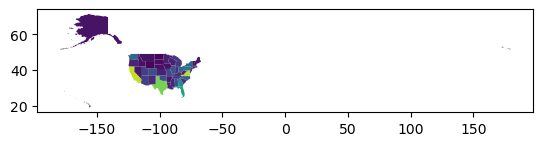

In [43]:
# will fix the map later
loc_us_50st_dbf_full[['count','geometry','NAME','STUSPS']].plot(column = 'count')
plt.show()

In [46]:
#loc_us_50st_dbf_full.to_file('st_distribution_us_only.shp')

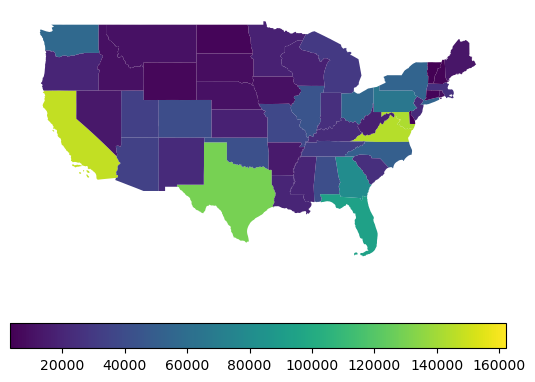

In [141]:
loc_us_50st_dbf_full[(loc_us_50st_dbf_full['LOC']!='02') & (loc_us_50st_dbf_full['LOC']!='15')]\
.plot(column = 'count', legend = True, legend_kwds = {'orientation':'horizontal'})
plt.axis('off')
plt.show()
plt.close()

In [131]:
loc_us_50st_dbf_full['count'].max()

162144

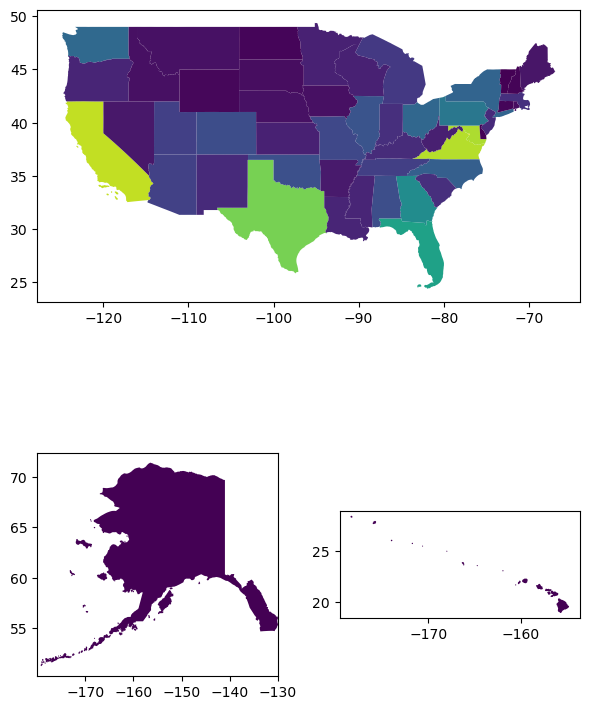

In [143]:
# importing required library
import matplotlib.pyplot as plt

# creating grid for subplots
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(6)
# , colspan=3, rowspan = 2
ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 2), loc=(1, 0))
ax3 = plt.subplot2grid(shape=(2, 2), loc=(1, 1))

# 1
loc_us_50st_dbf_full[(loc_us_50st_dbf_full['LOC']!='02') & (loc_us_50st_dbf_full['LOC']!='15')]\
.plot(ax = ax1,column = 'count')
#ax1.set_axis_off()
#2
loc_us_50st_dbf_full[loc_us_50st_dbf_full['LOC']=='02']\
.plot(ax = ax2,column = 'count')
#ax2.set_axis_off()
ax2.set_xlim(-179.9, -130) # set longitude range
# 3
loc_us_50st_dbf_full[loc_us_50st_dbf_full['LOC']=='15']\
.plot(ax = ax3,column = 'count')
#ax3.set_axis_off()

plt.tight_layout()
# display plot
plt.show()